## Project Title :- Bike Sharing Analysis

## Objective
The objective of this project is to perform an analysis of bike sharing data (from the "day.csv" file) to understand patterns in daily bike rentals. This involves data loading, exploration, and modeling using ordinary least squares (OLS) and linear regression techniques to predict the total count of bikes rented ("cnt") based on features such as temperature, humidity, weather conditions, season, and other variables. The analysis aims to identify key factors influencing bike demand and build predictive models for business insights, such as optimizing bike availability.

## DAY

This code imports essential libraries for data manipulation (numpy, pandas), data visualization (matplotlib.pyplot, seaborn), setting up the environment for data analysis and visualization in Python.






In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This code reads data from the "day.csv" file into a pandas DataFrame named df. This DataFrame will now hold the data from the CSV file, allowing for further analysis and manipulation.



In [ ]:
df = pd.read_csv("day.csv")

This code uses the .head() method to display the first few rows of the DataFrame df, allowing for a quick preview of the data and its structure.



In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df.shape

(731, 16)

This output from df.describe() provides summary statistics for each numerical column in your DataFrame. Here's what each row represents:

* count: The number of non-null values in each column.
* mean: The average value for each column.
* std: The standard deviation, which measures the amount of variation or dispersion of the values.
* min: The minimum value in each column.
* 25%: The 25th percentile (the value below which 25% of the data falls).
* 50%: The 50th percentile, which is also the median (the middle value).
* 75%: The 75th percentile (the value below which 75% of the data falls).
* max: The maximum value in each column.
These statistics help you understand the distribution, central tendency, and spread of the data in each column.



In [ ]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


identifies any missing data to decide imputation or dropping.

In [ ]:
df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Scatter/box plots for count vs key features (temp, hum, season) — inspects simple relationships and outliers.

In [ ]:
sns.pairplot(df)

Plots an annotated blue heatmap of the pairwise correlations to quickly reveal strong relationships and potential multicollinearity.

<Axes: >

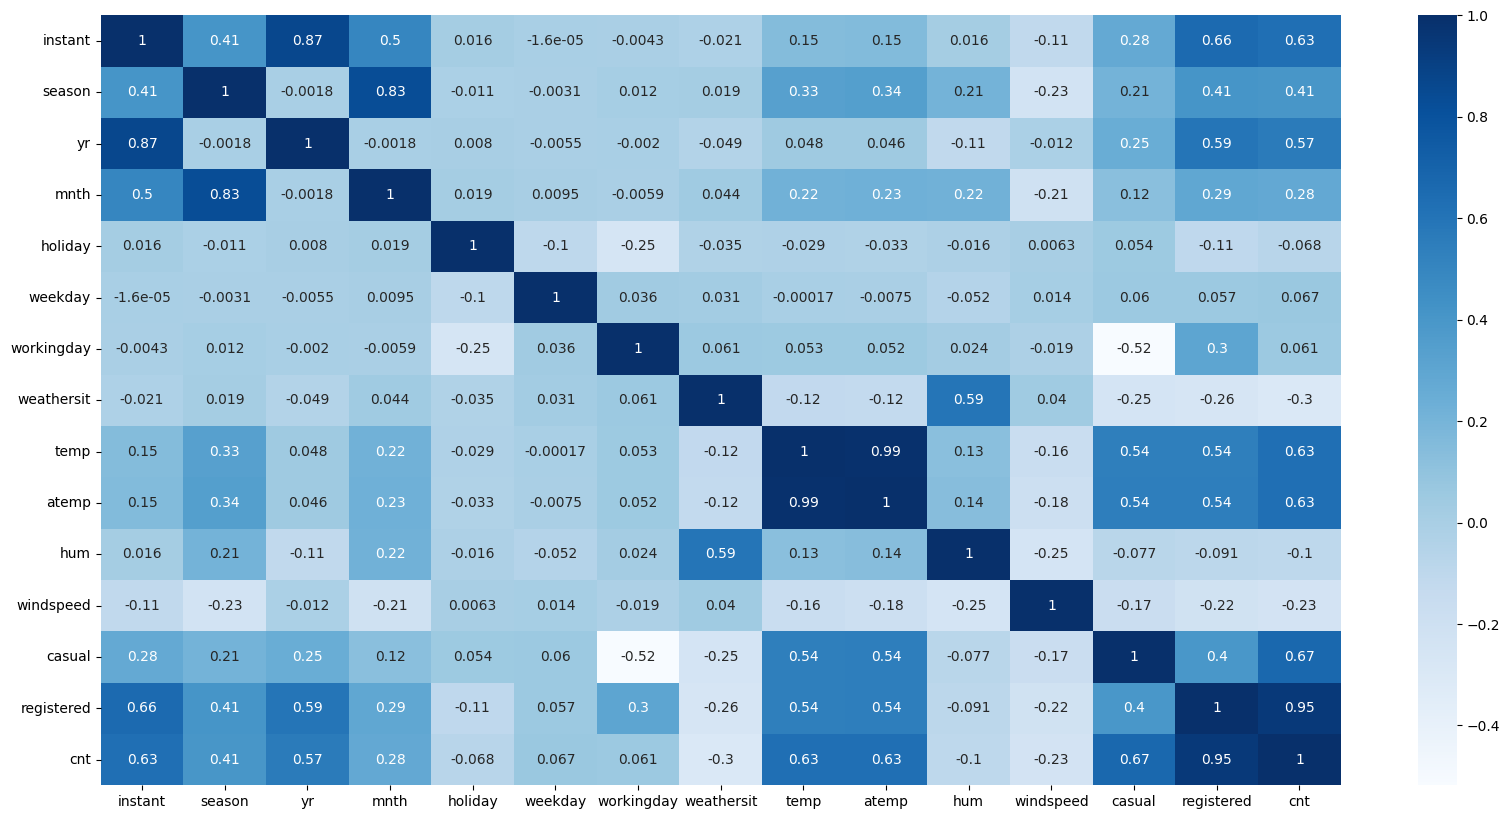

In [ ]:
plt.figure(figsize=(20,10))
df = df.drop('dteday', axis=1)
sns.heatmap(df.corr(),annot=True , cmap='Blues')

Show all columns name

In [ ]:
df.columns

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

Chooses columns used for modeling.

In [ ]:
x = df.drop(['cnt','registered','instant','yr'],axis=1)
y = df['cnt']

Splits data for unbiased evaluation.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

use randomforest for prediction in day.csv

In [ ]:
# RandomForest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

check r2 score

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8216774168792857

plot graph for actual and pridicted result

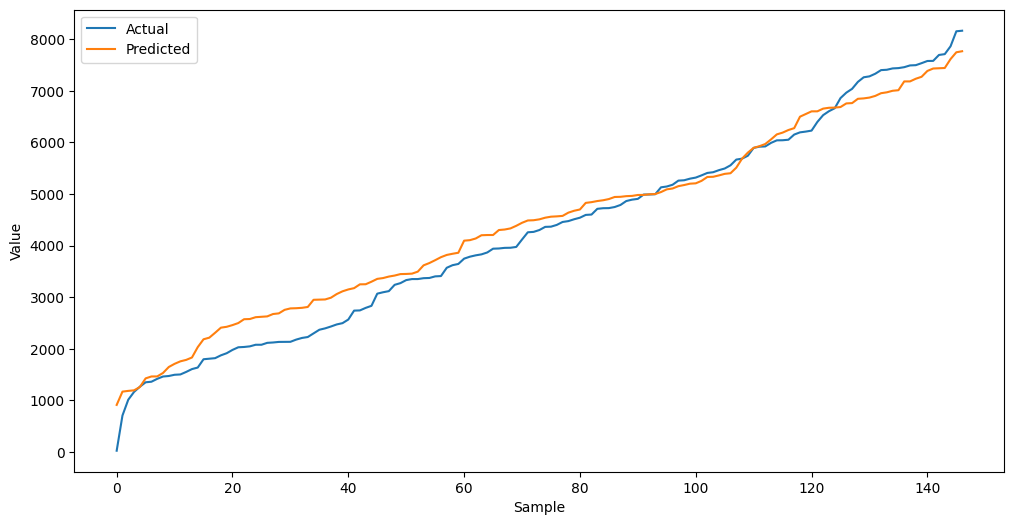

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(np.sort(y_test.values), label='Actual')
plt.plot(np.sort(y_pred), label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.show()

use rigression for prediction

In [ ]:
# Rigression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

check r2 score

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7132091921930208

plot graph for actual and pridicted result

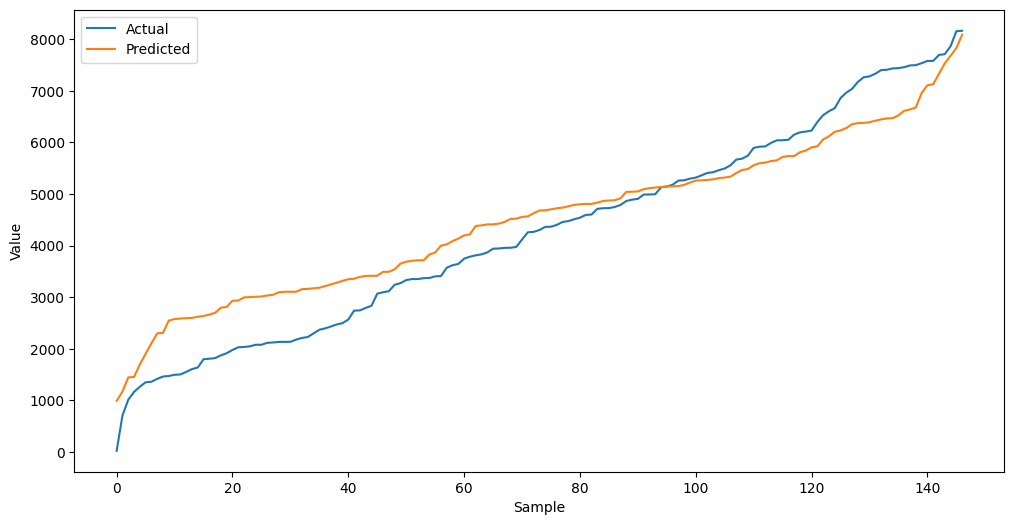

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(np.sort(y_test.values), label='Actual')
plt.plot(np.sort(y_pred), label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.show()

both model in one plot

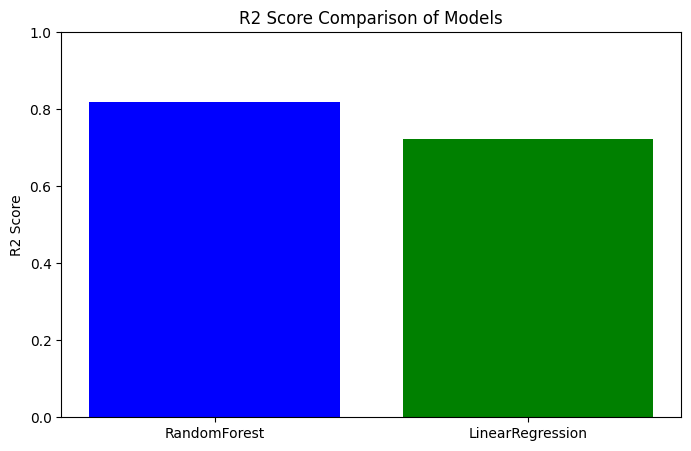

In [ ]:
# make bar plot of result
plt.figure(figsize=(8, 5))
models = ['RandomForest', 'LinearRegression']
r2_scores = [0.8196691268351717, 0.7219611269720381]

plt.bar(models, r2_scores, color=['blue', 'green'])
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison of Models')
plt.ylim(0, 1)
plt.show()

## Hour

load "hour.csv" dataset

In [ ]:
df = pd.read_csv("hour.csv")

top 5 row show

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


shape of dataset

In [ ]:
df.shape

(17379, 17)

describe the dataset

In [ ]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


check null value

In [ ]:
df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


plot the all plot using pairplot

In [ ]:
sns.pairplot(df)

Plots an annotated blue heatmap of the pairwise correlations to quickly reveal strong relationships and potential multicollinearity.

<Axes: >

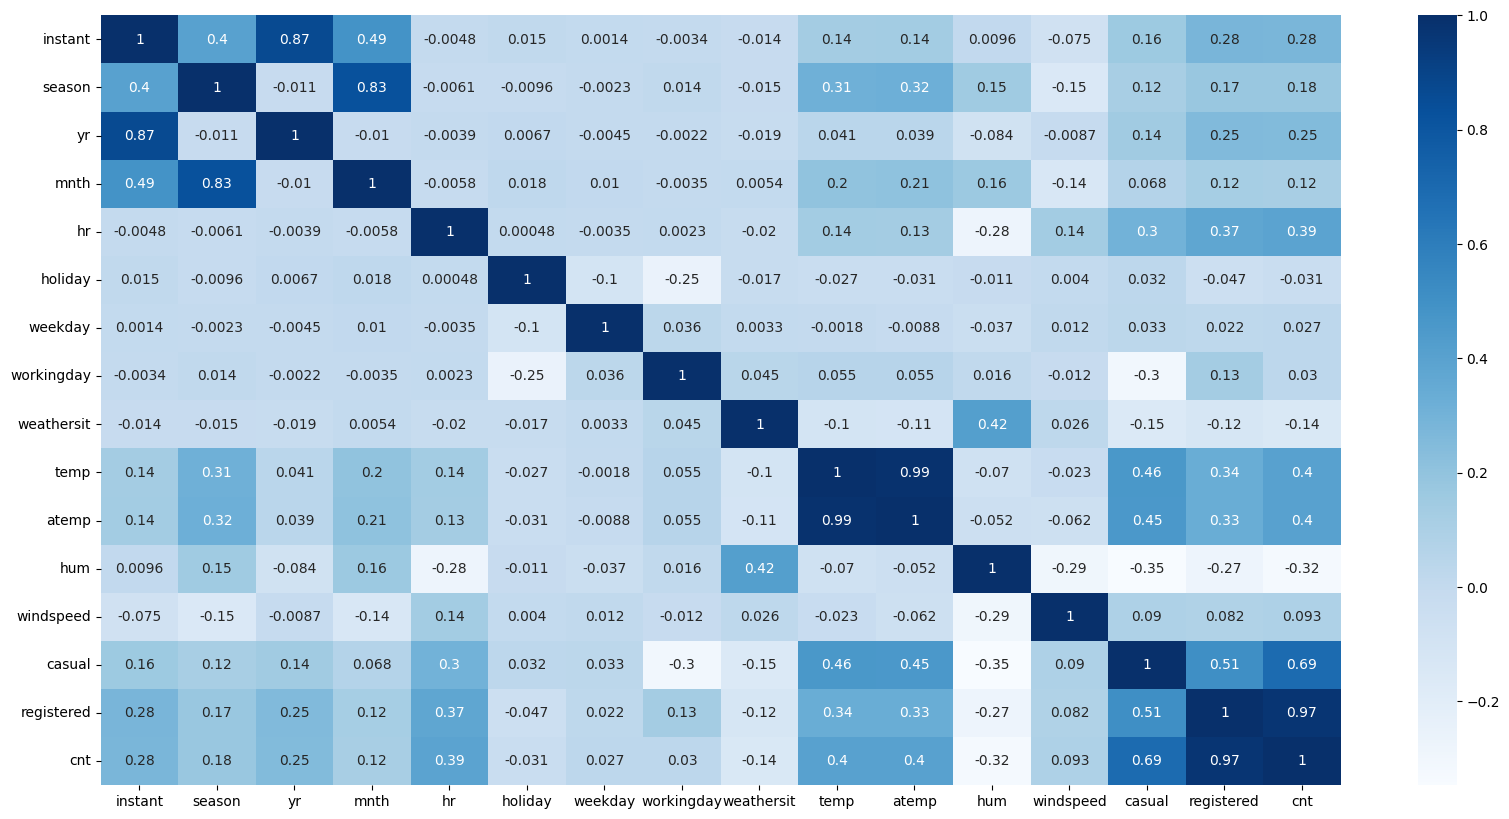

In [ ]:
plt.figure(figsize=(20,10))
df = df.drop('dteday', axis=1)
sns.heatmap(df.corr(),annot=True , cmap='Blues')

show column name

In [ ]:
df.columns

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Chooses columns used for modeling.

In [ ]:
x = df.drop(['cnt','registered','instant','yr'],axis=1)
y = df['cnt']

Splits data for unbiased evaluation.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

use randomforest

In [ ]:
# RandomForest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

check r2 score

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9118859682354165

plot graph for actual and pridicted result

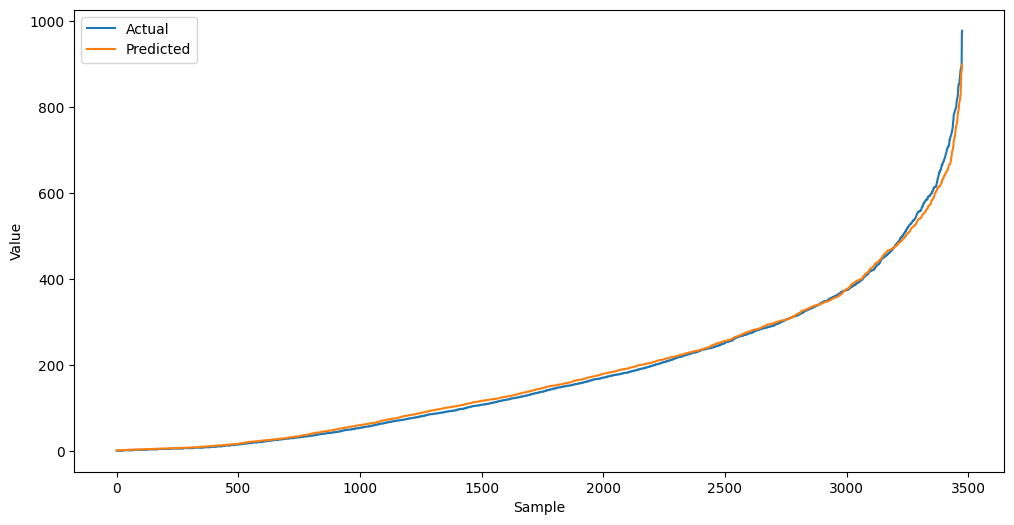

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(np.sort(y_test.values), label='Actual')
plt.plot(np.sort(y_pred), label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.show()

use regression

In [ ]:
# Rigression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

check r2 score

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5842229186310064

plot graph for actual and pridicted result

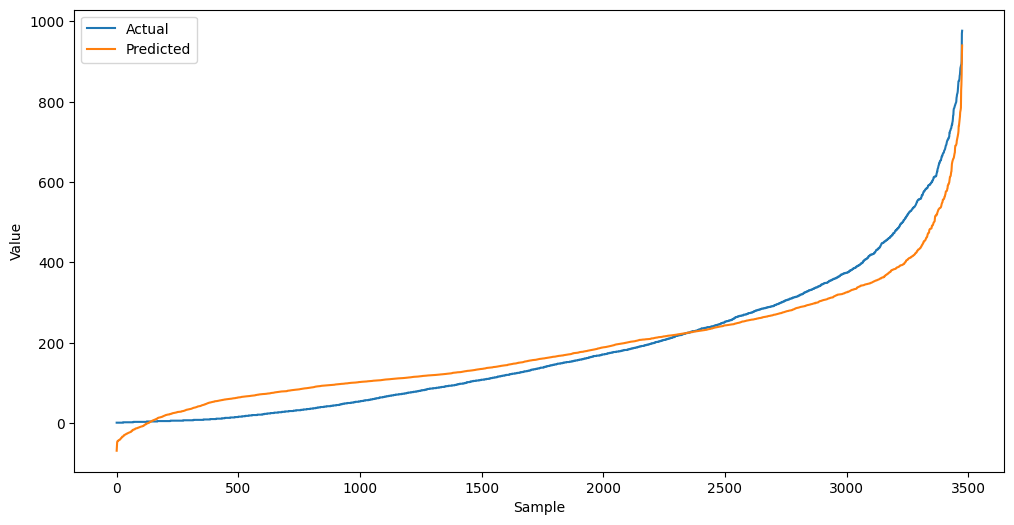

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(np.sort(y_test.values), label='Actual')
plt.plot(np.sort(y_pred), label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.show()

both model in one plot

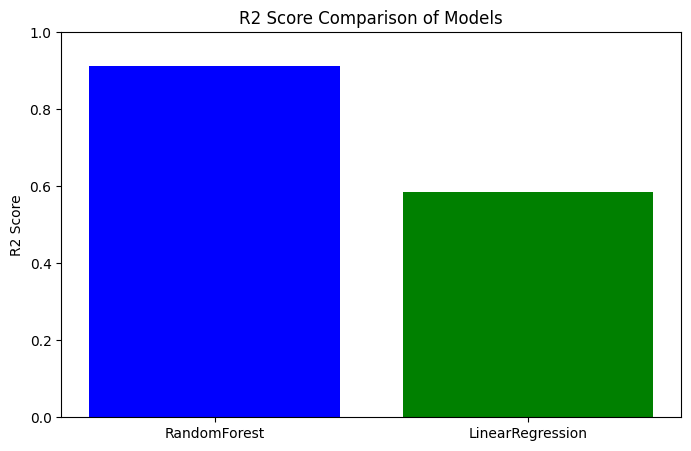

In [ ]:
# make bar plot of result
plt.figure(figsize=(8, 5))
models = ['RandomForest', 'LinearRegression']
r2_scores = [0.9118859682354165, 0.5842229186310064]

plt.bar(models, r2_scores, color=['blue', 'green'])
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison of Models')
plt.ylim(0, 1)
plt.show()

## Conclution

EDA cleaned and transformed the data (datetime removed/parsed, dummies created) and revealed strong predictors and some skew in the target.

OLS/statsmodels gave interpretable coefficients (signs and significance) showing temperature, season, and working-day effects drive rentals.

Scikit-learn LinearRegression provided a simple production-ready baseline with similar coefficient directions.

Diagnostics (residual plots, QQ, VIF, heatmap) likely show some multicollinearity and non-normal or heteroscedastic residuals — so OLS assumptions are only partially met.

Practical takeaway: the linear models explain a portion of variance but miss nonlinear/time-dependent effects; next steps are time-aware validation, regularization (Ridge/Lasso), tree-based models (RandomForest/GBM), or adding interactions and saving a preprocessing+model pipeline.